<a href="https://colab.research.google.com/github/comsa33/AI_07_session_1_project_-/blob/main/ai_07_%E1%84%8B%E1%85%B5%E1%84%85%E1%85%AE%E1%84%8B%E1%85%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp, ttest_ind, chisquare, chi2_contingency, f_oneway
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib as mpl

from matplotlib import font_manager, rc


%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family = 'NanumBarunGothic')
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'


plt.rc('font', family='NanumBarunGothic') 

path = "/content/drive/MyDrive/vgames2.csv"

df_vgames = pd.read_csv(path, index_col=0)

df_vgames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [4]:
df_vgames.isna().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [5]:
cols = df_vgames.columns
for col in cols:
    missing_rate = df_vgames[col].isna().sum()/df_vgames.shape[0]
    if missing_rate > 0:
        print('[{}]의 결측치 비율은 {}% 입니다'.format(col, round(missing_rate*100,4)))

[Year]의 결측치 비율은 1.6327% 입니다
[Genre]의 결측치 비율은 0.3012% 입니다
[Publisher]의 결측치 비율은 0.3494% 입니다


In [6]:
df_new = df_vgames.copy()
df_new['Publisher'] = df_new['Publisher'].fillna('Unknown')
df_new = df_new.dropna(axis=0)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16277 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16277 non-null  object 
 1   Platform     16277 non-null  object 
 2   Year         16277 non-null  float64
 3   Genre        16277 non-null  object 
 4   Publisher    16277 non-null  object 
 5   NA_Sales     16277 non-null  object 
 6   EU_Sales     16277 non-null  object 
 7   JP_Sales     16277 non-null  object 
 8   Other_Sales  16277 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


In [7]:
df_new[cols[5]]

1        0.04
2        0.17
3           0
4        0.04
5        0.12
         ... 
16594    0.15
16595    0.01
16596    0.44
16597    0.05
16598       0
Name: NA_Sales, Length: 16277, dtype: object

In [8]:
def unify_num(string):
    if 'K' in string:
        new_string = string.replace('K', '')
        return float(new_string)*0.001
    elif 'M' in string:
        new_string = string.replace('M', '')
        return float(new_string)
    else:
        return float(string)

In [9]:
df_new[cols[5:]] = df_new[cols[5:]].applymap(unify_num)

In [10]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16277 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16277 non-null  object 
 1   Platform     16277 non-null  object 
 2   Year         16277 non-null  float64
 3   Genre        16277 non-null  object 
 4   Publisher    16277 non-null  object 
 5   NA_Sales     16277 non-null  float64
 6   EU_Sales     16277 non-null  float64
 7   JP_Sales     16277 non-null  float64
 8   Other_Sales  16277 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.2+ MB


In [11]:
df_new.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [12]:
df_new['Genre'].unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter'], dtype=object)

In [13]:
df_new['Genre'] = df_new['Genre'].astype("category")
df_new['Platform'] = df_new['Platform'].astype("category")

df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16277 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Name         16277 non-null  object  
 1   Platform     16277 non-null  category
 2   Year         16277 non-null  float64 
 3   Genre        16277 non-null  category
 4   Publisher    16277 non-null  object  
 5   NA_Sales     16277 non-null  float64 
 6   EU_Sales     16277 non-null  float64 
 7   JP_Sales     16277 non-null  float64 
 8   Other_Sales  16277 non-null  float64 
dtypes: category(2), float64(5), object(2)
memory usage: 1.0+ MB


In [14]:
df_new.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [15]:
df_new['Total_Sales'] = df_new[cols[5:]].sum(axis=1)
df_new.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [16]:
def year2str(year):
    if int(year) <= 21:
        year = 2000+int(year)
    elif int(year) < 100 and int(year) > 50:
        year = 1900+int(year)
    return str(int(year))

In [17]:
df_new['Year'] = df_new['Year'].apply(year2str)

In [18]:
set(df_new['Year'].values)

{'1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2020'}

In [19]:
year_genre_df = pd.crosstab(df_new['Year'], df_new['Genre'])
year_genre_df

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,1,0,1,4,0,0,0,0,2,0,0,0
1981,25,0,0,0,3,2,1,0,10,1,4,0
1982,18,0,0,1,5,3,2,0,5,0,2,0
1983,7,1,0,1,5,1,0,0,1,0,1,0
1984,1,0,0,1,1,3,3,0,3,0,2,0
1985,2,0,1,0,4,4,0,0,1,1,1,0
1986,6,0,0,0,6,0,1,1,4,0,3,0
1987,2,1,2,0,2,0,0,3,2,0,4,0
1988,2,0,0,0,4,1,1,3,1,1,2,0


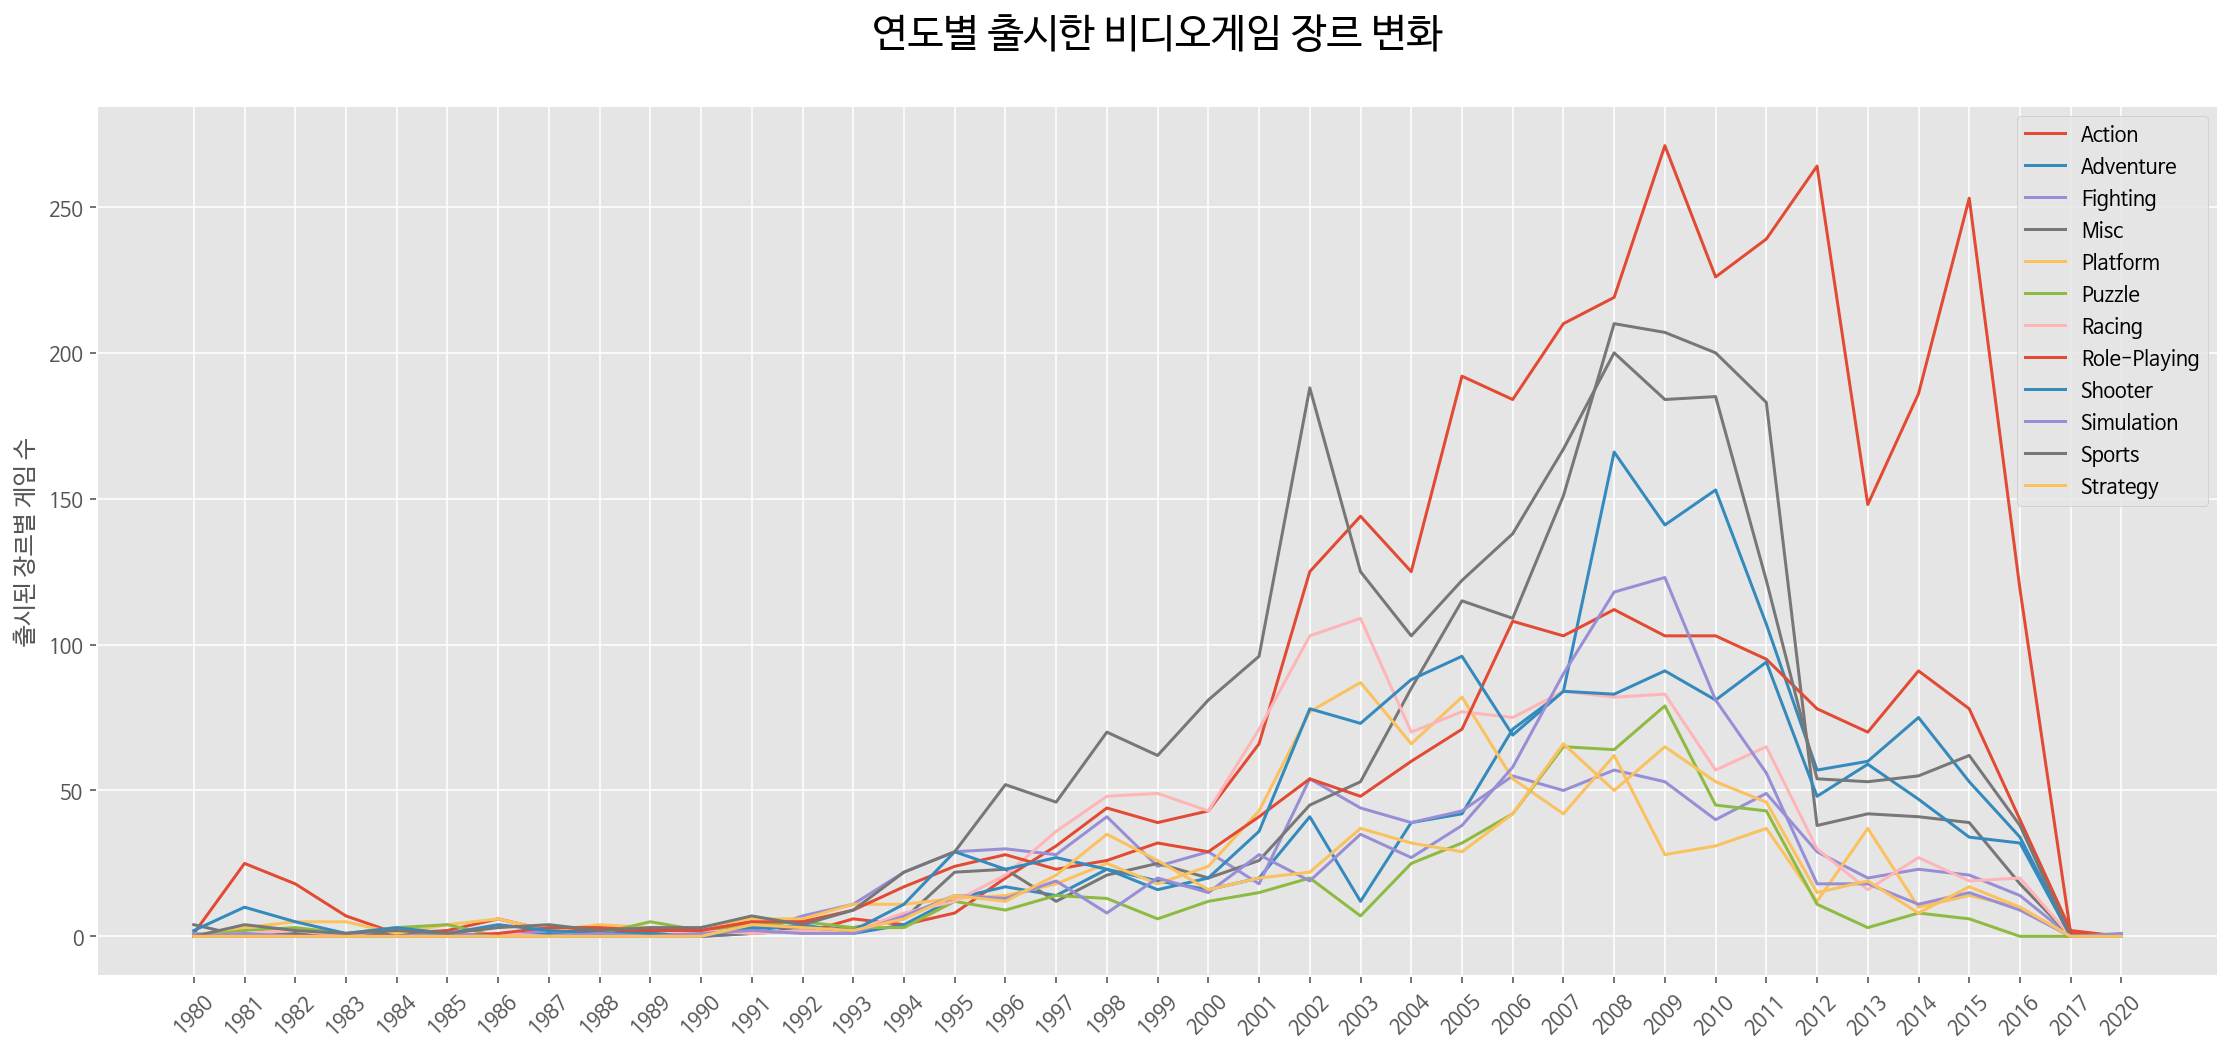

In [20]:
plt.figure(figsize=(19,8))
plt.plot(year_genre_df)
plt.xticks(rotation=45)
plt.legend(year_genre_df.columns)
plt.ylabel('출시된 장르별 게임 수')
plt.title('연도별 출시한 비디오게임 장르 변화\n', fontsize=20)
plt.show()

In [21]:
year_genre_sales_df = df_new.groupby(by=['Year', 'Genre'])['Total_Sales'].sum().reset_index()
year_genre_sales_df.head(10)

,Year,Genre,Total_Sales
0,1980,Action,0.34
1,1980,Adventure,NaN
2,1980,Fighting,0.77
3,1980,Misc,2.70
4,1980,Platform,NaN
5,1980,Puzzle,NaN
6,1980,Racing,NaN
7,1980,Role-Playing,NaN
8,1980,Shooter,7.07
9,1980,Simulation,NaN


In [22]:
yg_sales_pt = year_genre_sales_df.pivot('Year', 'Genre', 'Total_Sales')

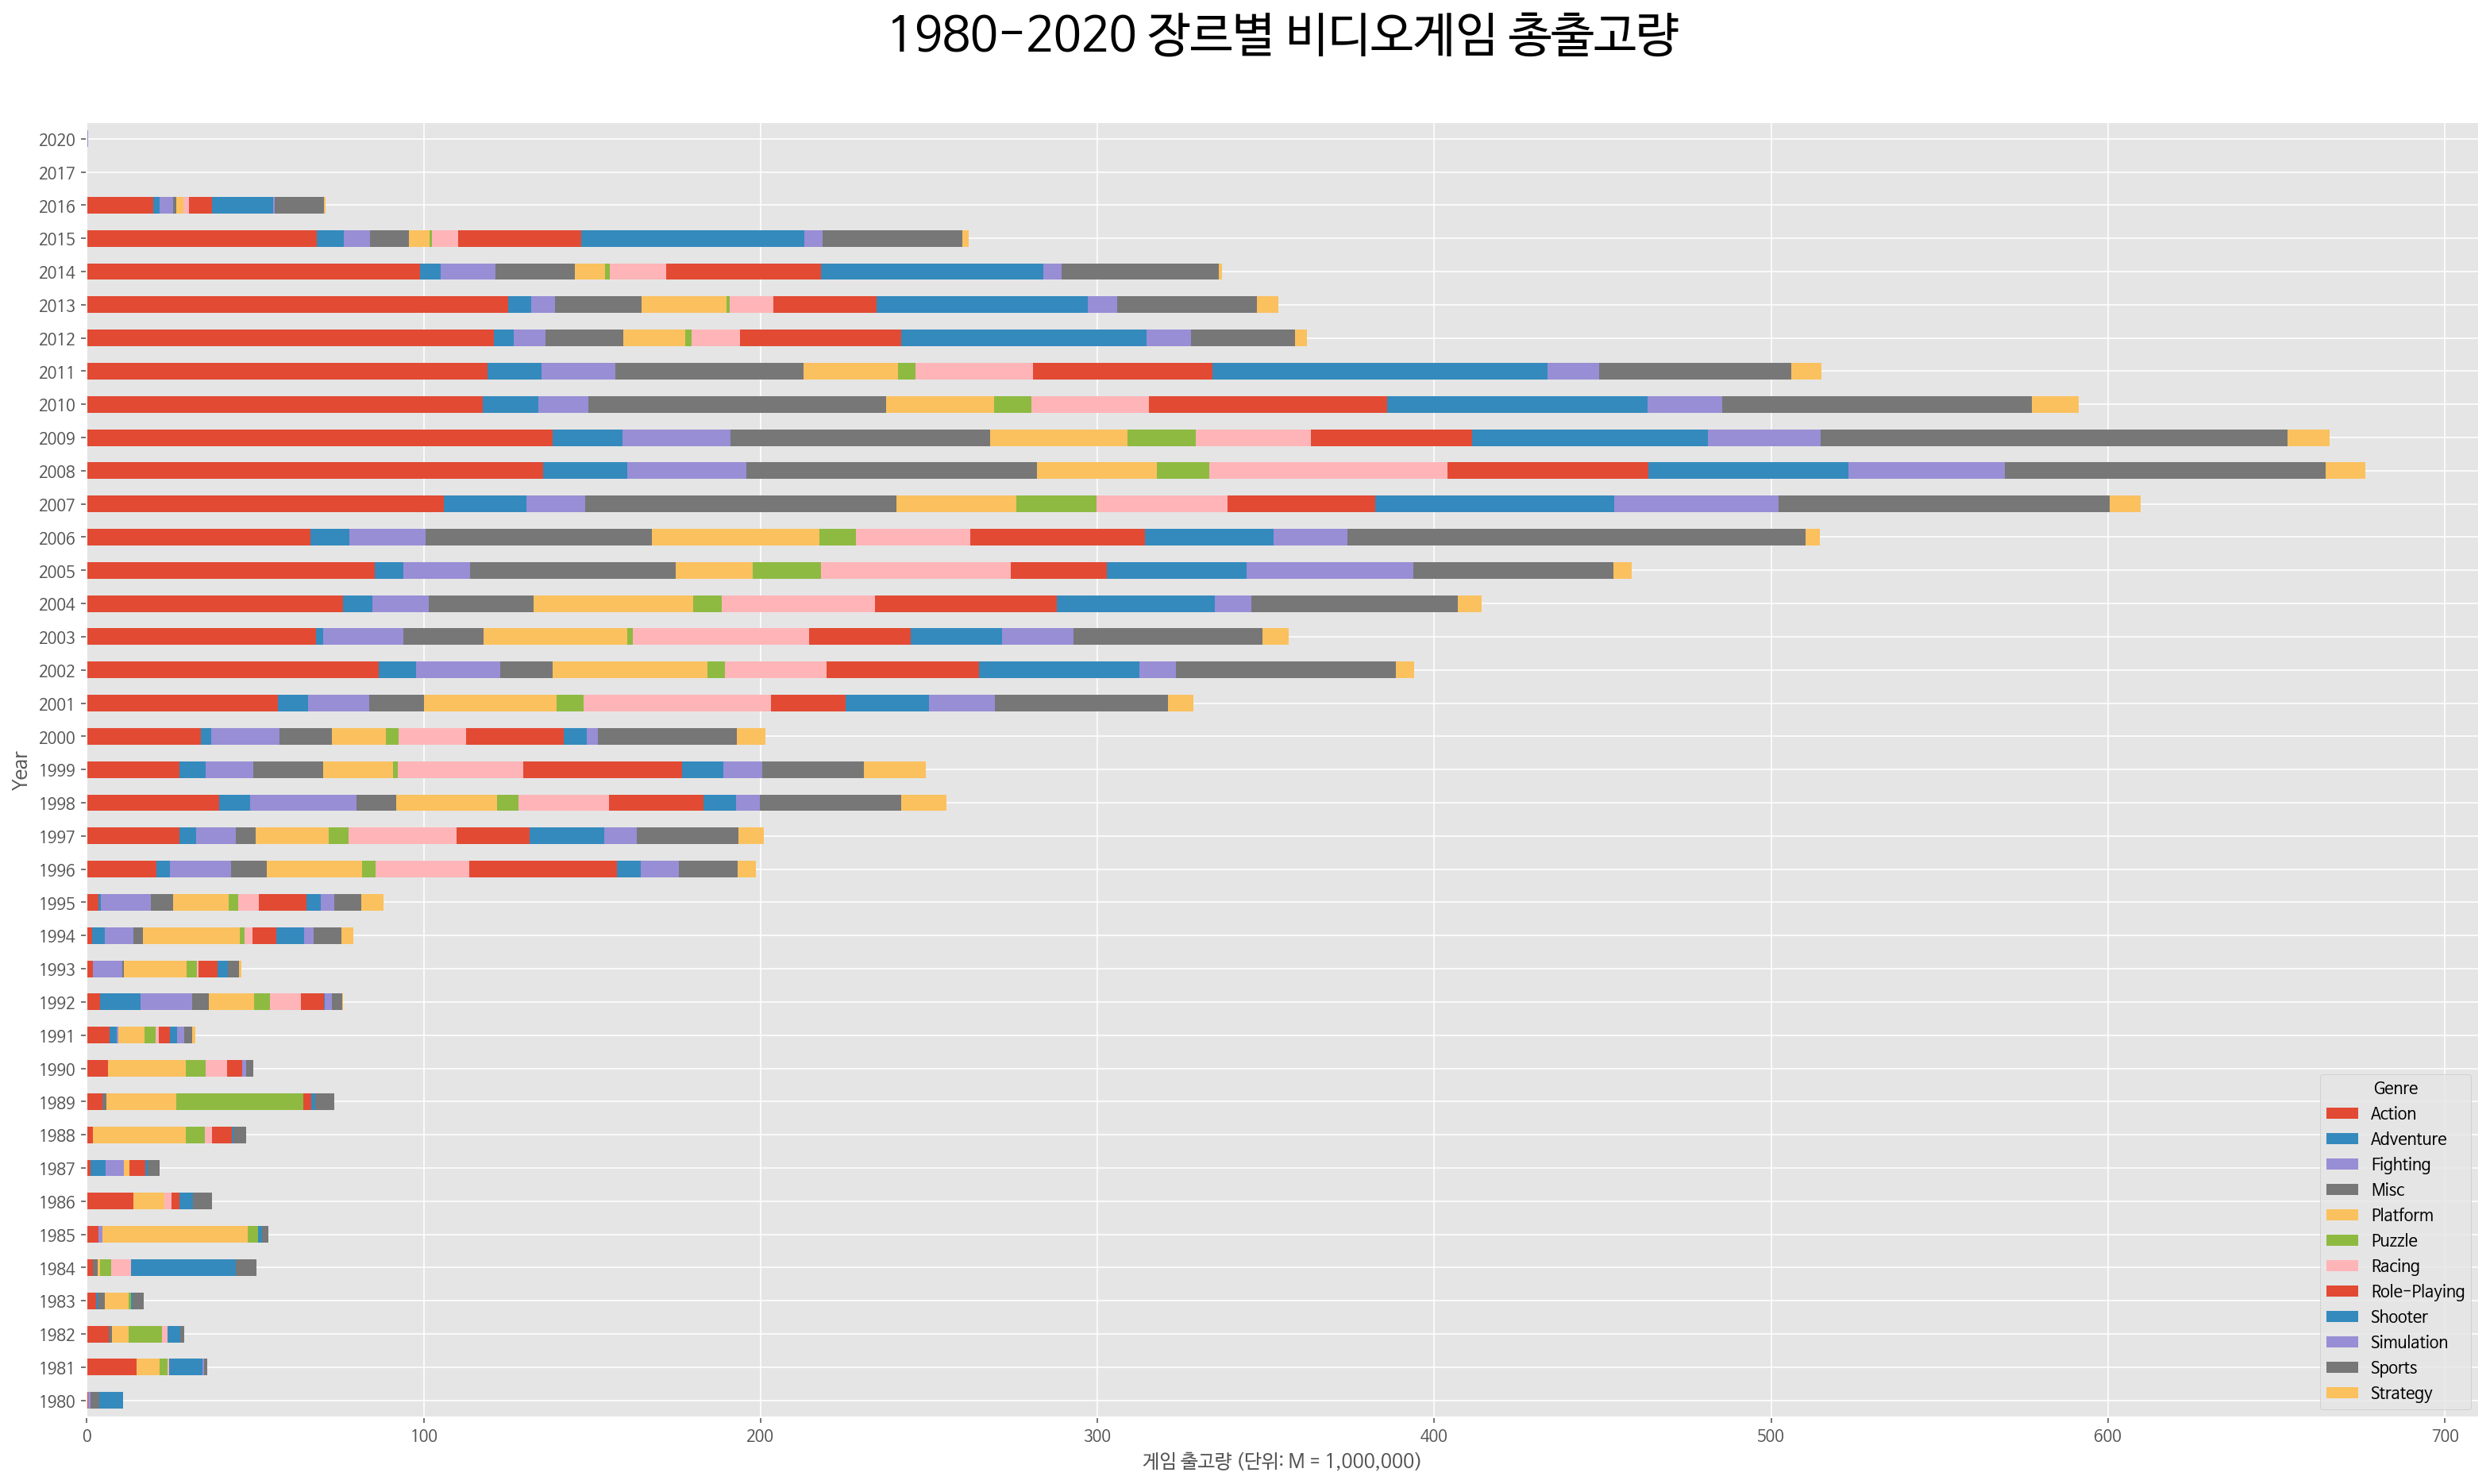

In [23]:
yg_sales_pt.plot(kind='barh', stacked=True, figsize=(27,15))
plt.xlabel('게임 출고량 (단위: M = 1,000,000)')
plt.title('1980-2020 장르별 비디오게임 총출고량\n', fontsize=30)
plt.show()

In [24]:
genre_max_df = year_genre_sales_df.groupby(by='Year').max().reset_index()
year_genre_max_sales_df = pd.merge(year_genre_sales_df, genre_max_df)
year_genre_max_sales_df.tail(10)

,Year,Genre,Total_Sales
29,2009,Sports,138.59
30,2010,Action,117.50
31,2011,Action,119.00
32,2012,Action,120.81
33,2013,Action,125.21
34,2014,Action,99.01
35,2015,Action,68.25
36,2016,Action,19.85
37,2017,Role-Playing,0.04
38,2020,Simulation,0.29


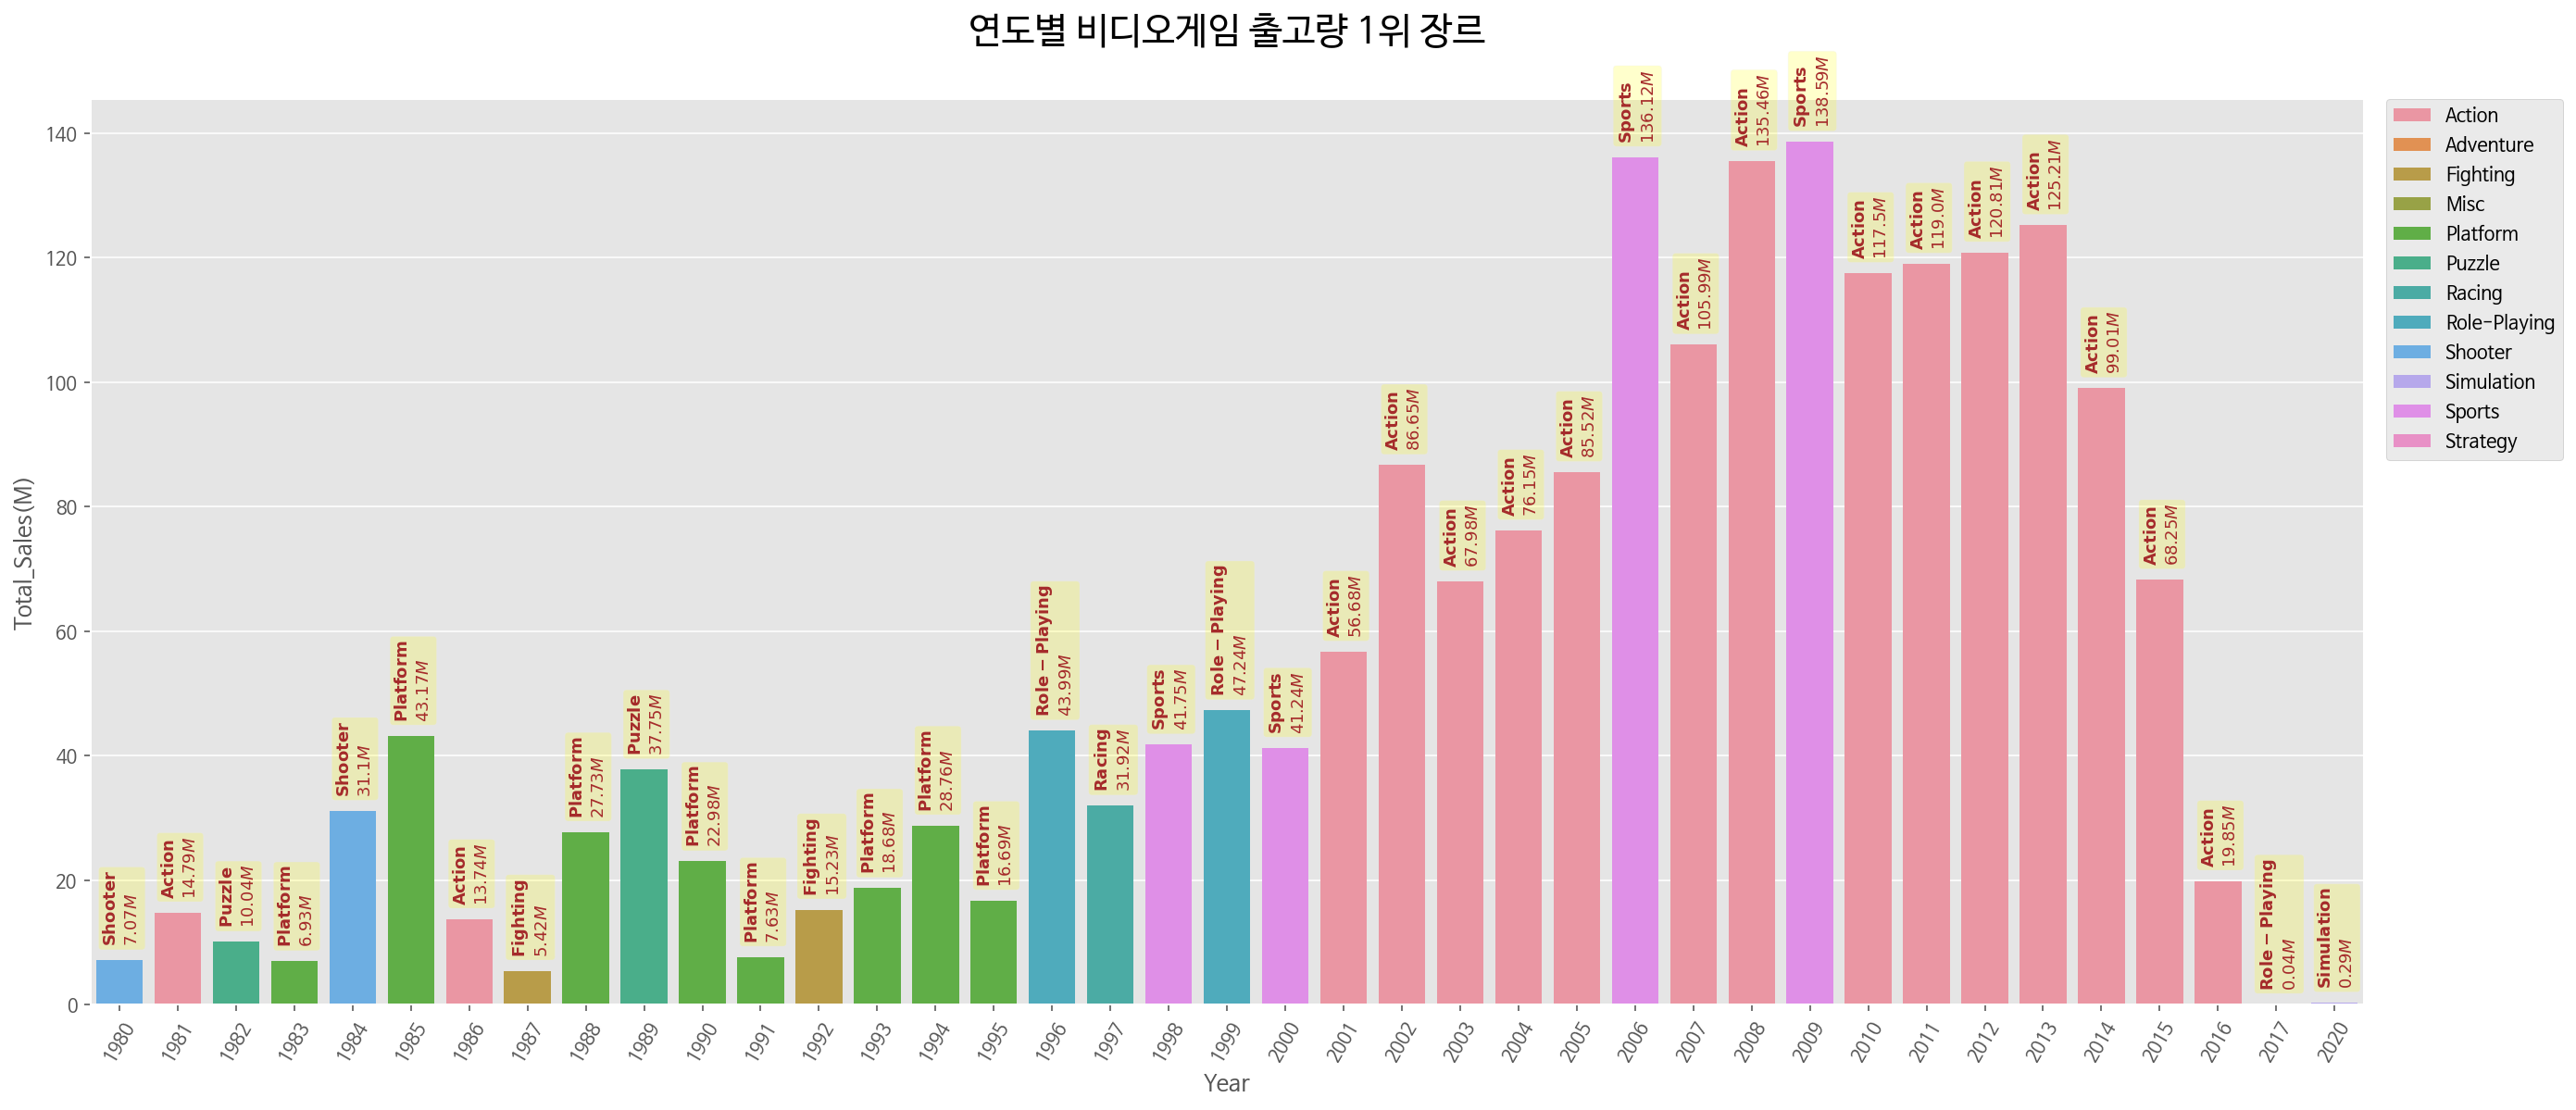

In [25]:
plt.figure(figsize=(22, 9))
sns.barplot(data=year_genre_max_sales_df, x='Year', y='Total_Sales', 
            hue='Genre', dodge=False)
for i, (g, s) in enumerate(year_genre_max_sales_df[['Genre', 'Total_Sales']].values):
    plt.annotate('$\\bf{}$\n${}M$'.format(g,round(s,2)), 
                 (i-0.3, s+3), rotation=90, fontsize=9, color='brown',
                 bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.2))
plt.ylabel('Total_Sales(M)')
plt.xticks(rotation=60)
plt.title('연도별 비디오게임 출고량 1위 장르\n', fontsize=20)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.show()

In [26]:
genre_region_df = pd.concat((df_new[cols[3]], df_new[cols[5:9]]), axis=1)
genre_region_df.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Action,0.04,0.00,0.00,0.00
2,Action,0.17,0.00,0.00,0.01
3,Adventure,0.00,0.00,0.02,0.00
4,Misc,0.04,0.00,0.00,0.00
5,Platform,0.12,0.09,0.00,0.04


In [27]:
genre_region_df = genre_region_df.groupby(by='Genre', axis=0).sum()
genre_region_df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,858.78,513.64,156.61,183.99
Adventure,101.92,63.71,51.89,16.70
Fighting,220.35,99.90,87.14,36.15
Misc,400.29,210.20,104.18,72.74
Platform,445.38,200.65,130.53,51.45
Puzzle,121.58,50.48,56.24,12.44
Racing,354.70,235.03,56.32,76.51
Role-Playing,318.76,183.10,342.93,56.73
Shooter,574.48,310.23,38.18,101.86


/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:348: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


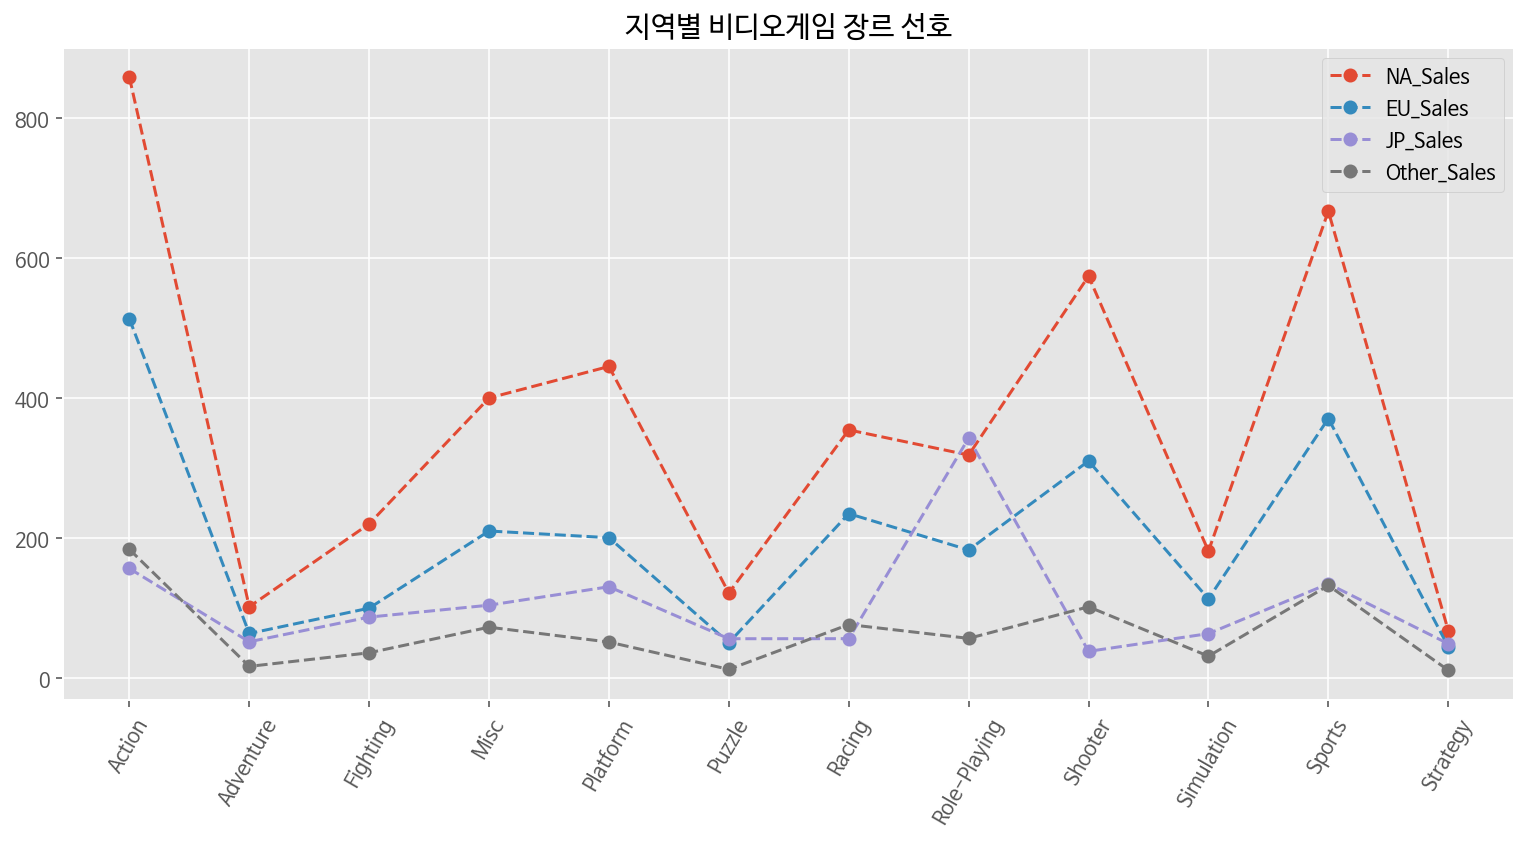

In [28]:
plt.figure(figsize=(13,6))
plt.plot(genre_region_df, 'o--')
plt.xticks(rotation=60)
plt.legend(genre_region_df.columns)
plt.title('지역별 비디오게임 장르 선호')
plt.show()

In [29]:
region_genre_chi_result = chi2_contingency(genre_region_df)
region_genre_chi_result

(685.0133262776887,
 6.974269309839113e-123,
 33,
 array([[843.01590495, 468.33999756, 248.52121857, 153.14287892],
        [115.26496203,  64.03579306,  33.98012855,  20.93911636],
        [218.27607061, 121.26392133,  64.34781922,  39.65218883],
        [387.50227885, 215.27804549, 114.23573147,  70.3939442 ],
        [407.48245757, 226.3780933 , 120.12589123,  74.02355791],
        [118.47360157,  65.81836231,  34.92603598,  21.52200013],
        [355.5881264 , 197.54804301, 104.82743441,  64.59639618],
        [443.65839198, 246.47574144, 130.79056226,  80.59530432],
        [504.30266348, 280.16684715, 148.66850284,  91.61198653],
        [191.66207887, 106.47843893,  56.50201036,  34.81747185],
        [642.3873518 , 356.88020713, 189.37589021, 116.69655087],
        [ 85.20611189,  47.33650931,  25.1187749 ,  15.4786039 ]]))

In [30]:
print('지역-게임장르 카이제곱 검정 P.Value : {}'.format(round(region_genre_chi_result[1], 7)))
print('지역에 따라 게임의 장르를 선호하는 것이 확실히 다르다')

지역-게임장르 카이제곱 검정 P.Value : 0.0
지역에 따라 게임의 장르를 선호하는 것이 확실히 다르다


In [31]:
standard = df_new['Total_Sales'].quantile(0.87)

In [32]:
ts_df = df_new[df_new['Total_Sales'].values > standard].sort_values('Total_Sales')
ts_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
10686,Far Cry 3,PC,2012,Shooter,Ubisoft,0.21,0.62,0.00,0.14,0.97
486,Romancing SaGa,SNES,1992,Role-Playing,SquareSoft,0.00,0.00,0.97,0.00,0.97
2601,Driver: San Francisco,PS3,2011,Racing,Ubisoft,0.24,0.54,0.01,0.18,0.97
643,LEGO Star Wars II: The Original Trilogy,GC,2006,Action,LucasArts,0.75,0.19,0.00,0.03,0.97
10840,Fire Emblem,GBA,2003,Strategy,Nintendo,0.49,0.18,0.29,0.01,0.97
...,...,...,...,...,...,...,...,...,...,...
7830,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
3353,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
12580,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
4200,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [33]:
ts_pub_df = ts_df.Publisher.value_counts().reset_index()
ts_pub_df.rename(columns={'index':'Publisher', 'Publisher':'Count'}, inplace=True)
ts_pub_df

,Publisher,Count
0,Electronic Arts,348
1,Nintendo,339
2,Activision,161
3,Sony Computer Entertainment,150
4,Ubisoft,124
...,...,...
95,Russel,1
96,Parker Bros.,1
97,ASC Games,1
98,Atlus,1


In [34]:
cond = (ts_pub_df['Count'].values > ts_pub_df['Count'].quantile(0.5))

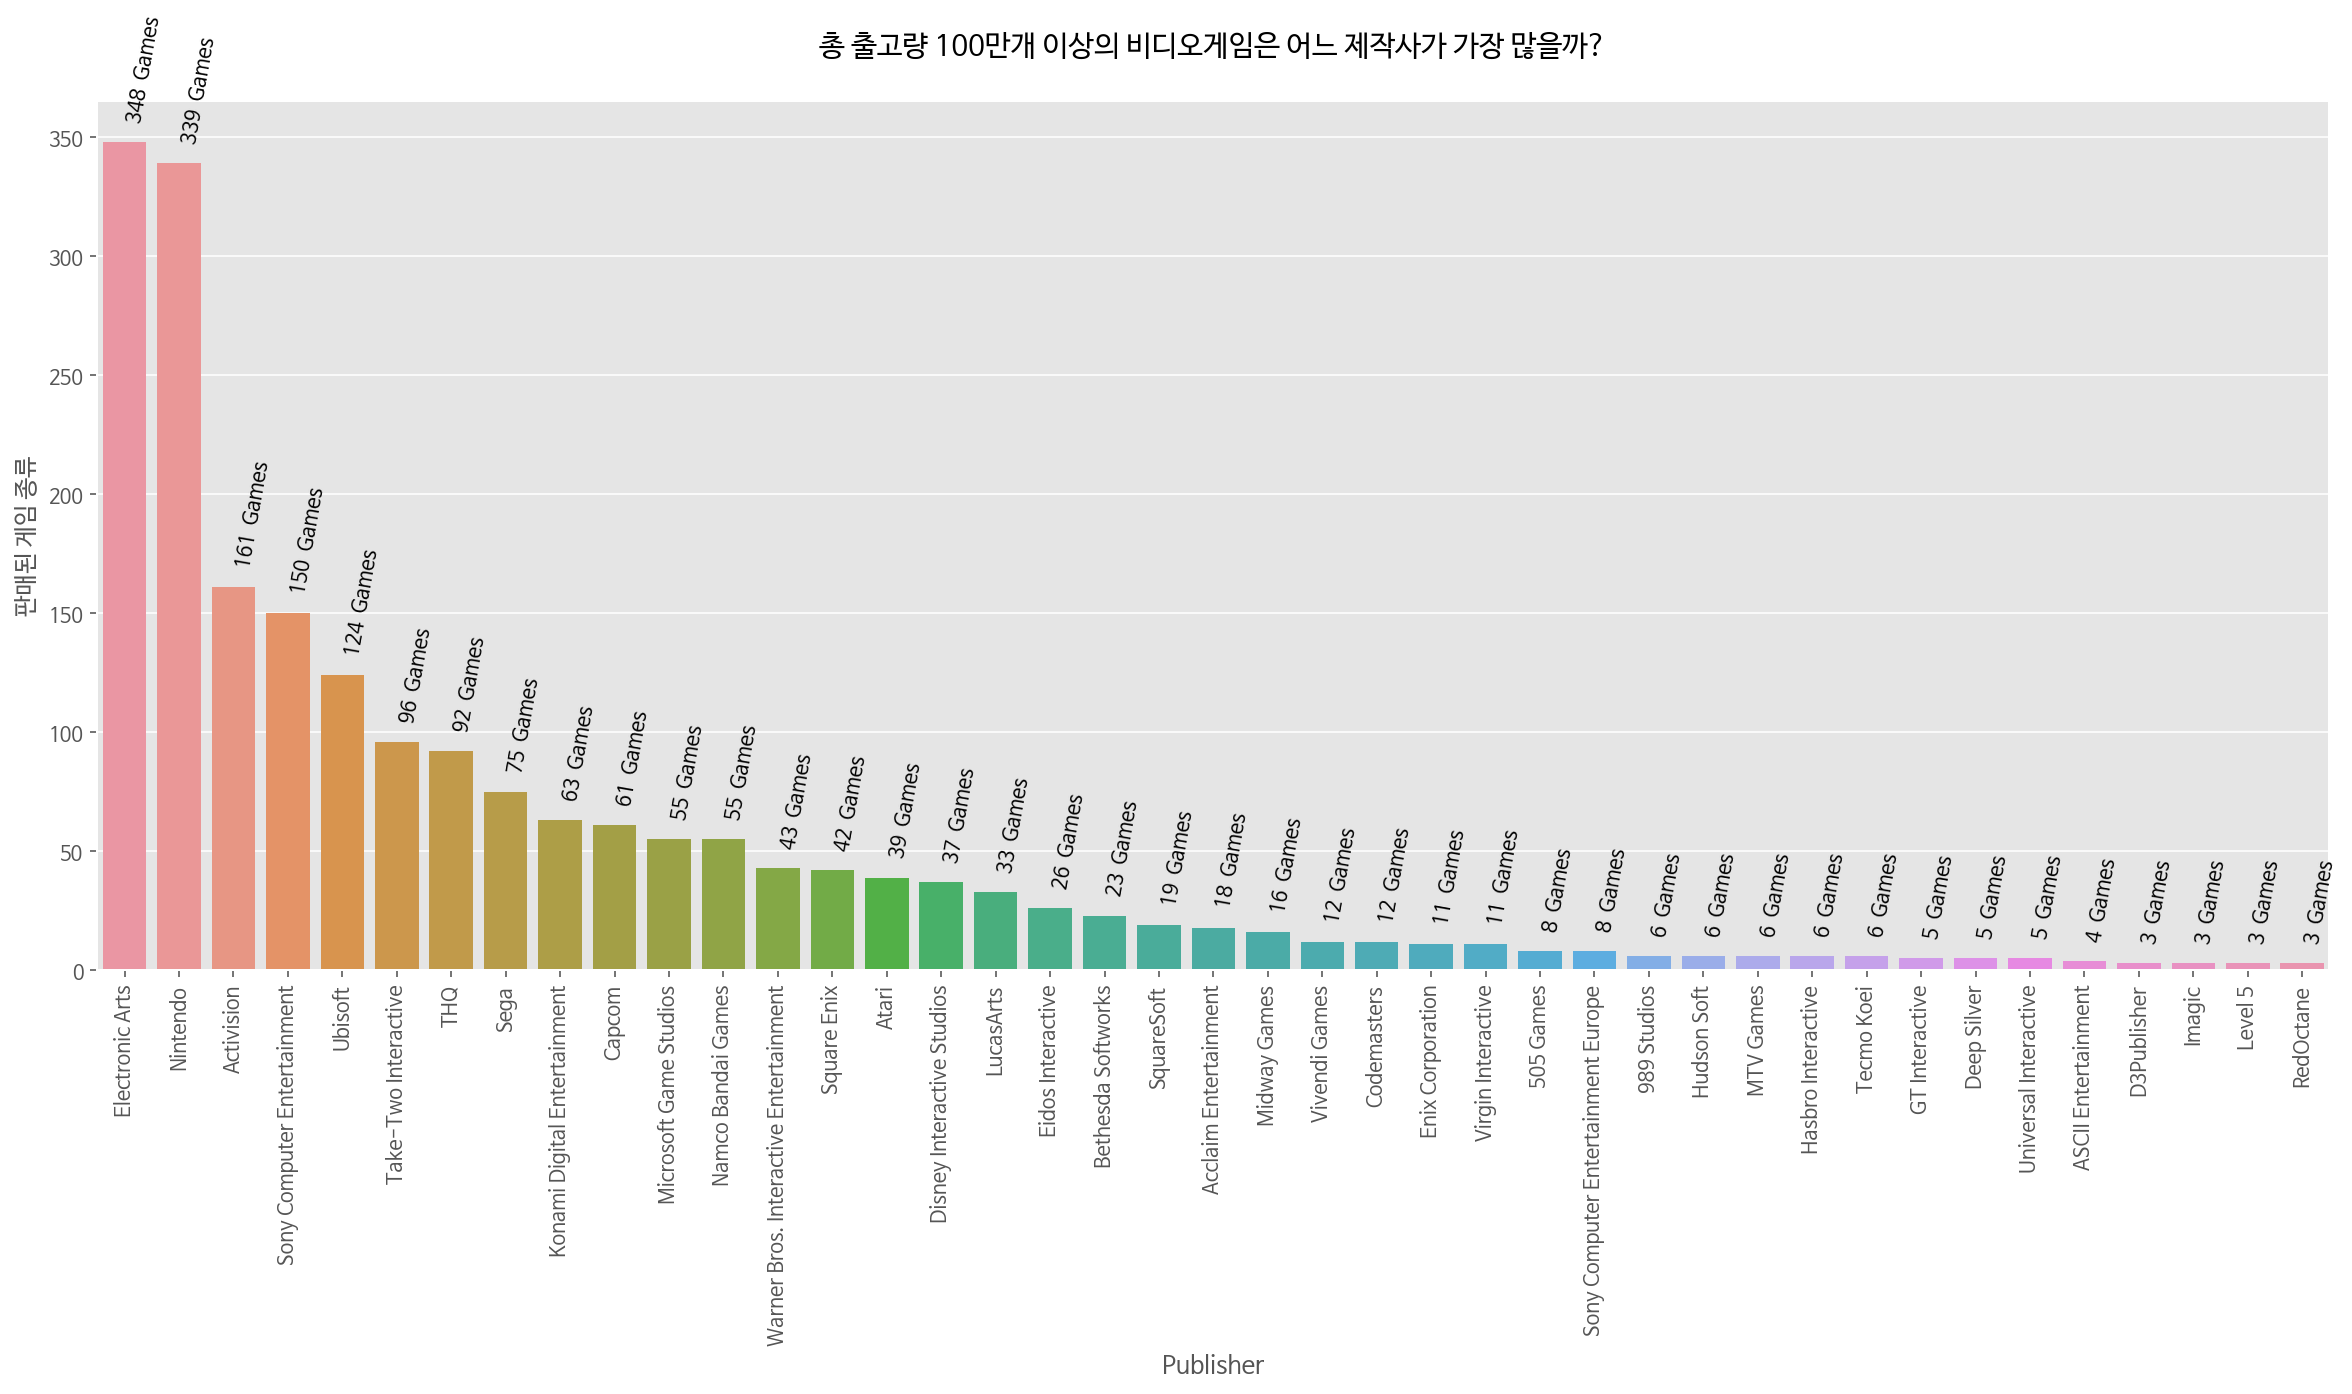

In [35]:
plt.figure(figsize=(20,8))
sns.barplot(data=ts_pub_df[cond], x='Publisher', y='Count')
for i, (pub, count) in enumerate(ts_pub_df[cond].values):
    plt.annotate('{}  Games'.format(count), (i, count+10), rotation=80)
plt.xticks(rotation=90)
plt.ylabel('판매된 게임 종류')
plt.title('총 출고량 100만개 이상의 비디오게임은 어느 제작사가 가장 많을까?\n')
plt.show()

In [36]:
ts_gen_df = ts_df.Genre.value_counts().reset_index()
ts_gen_df.rename(columns={'index':'Genre', 'Genre':'Count'}, inplace=True)
ts_gen_df.sort_values('Count', inplace=False)
ts_gen_df

,Genre,Count
0,Action,428
1,Sports,311
2,Shooter,253
3,Role-Playing,207
4,Platform,197
5,Racing,186
6,Misc,172
7,Fighting,124
8,Simulation,98
9,Puzzle,57


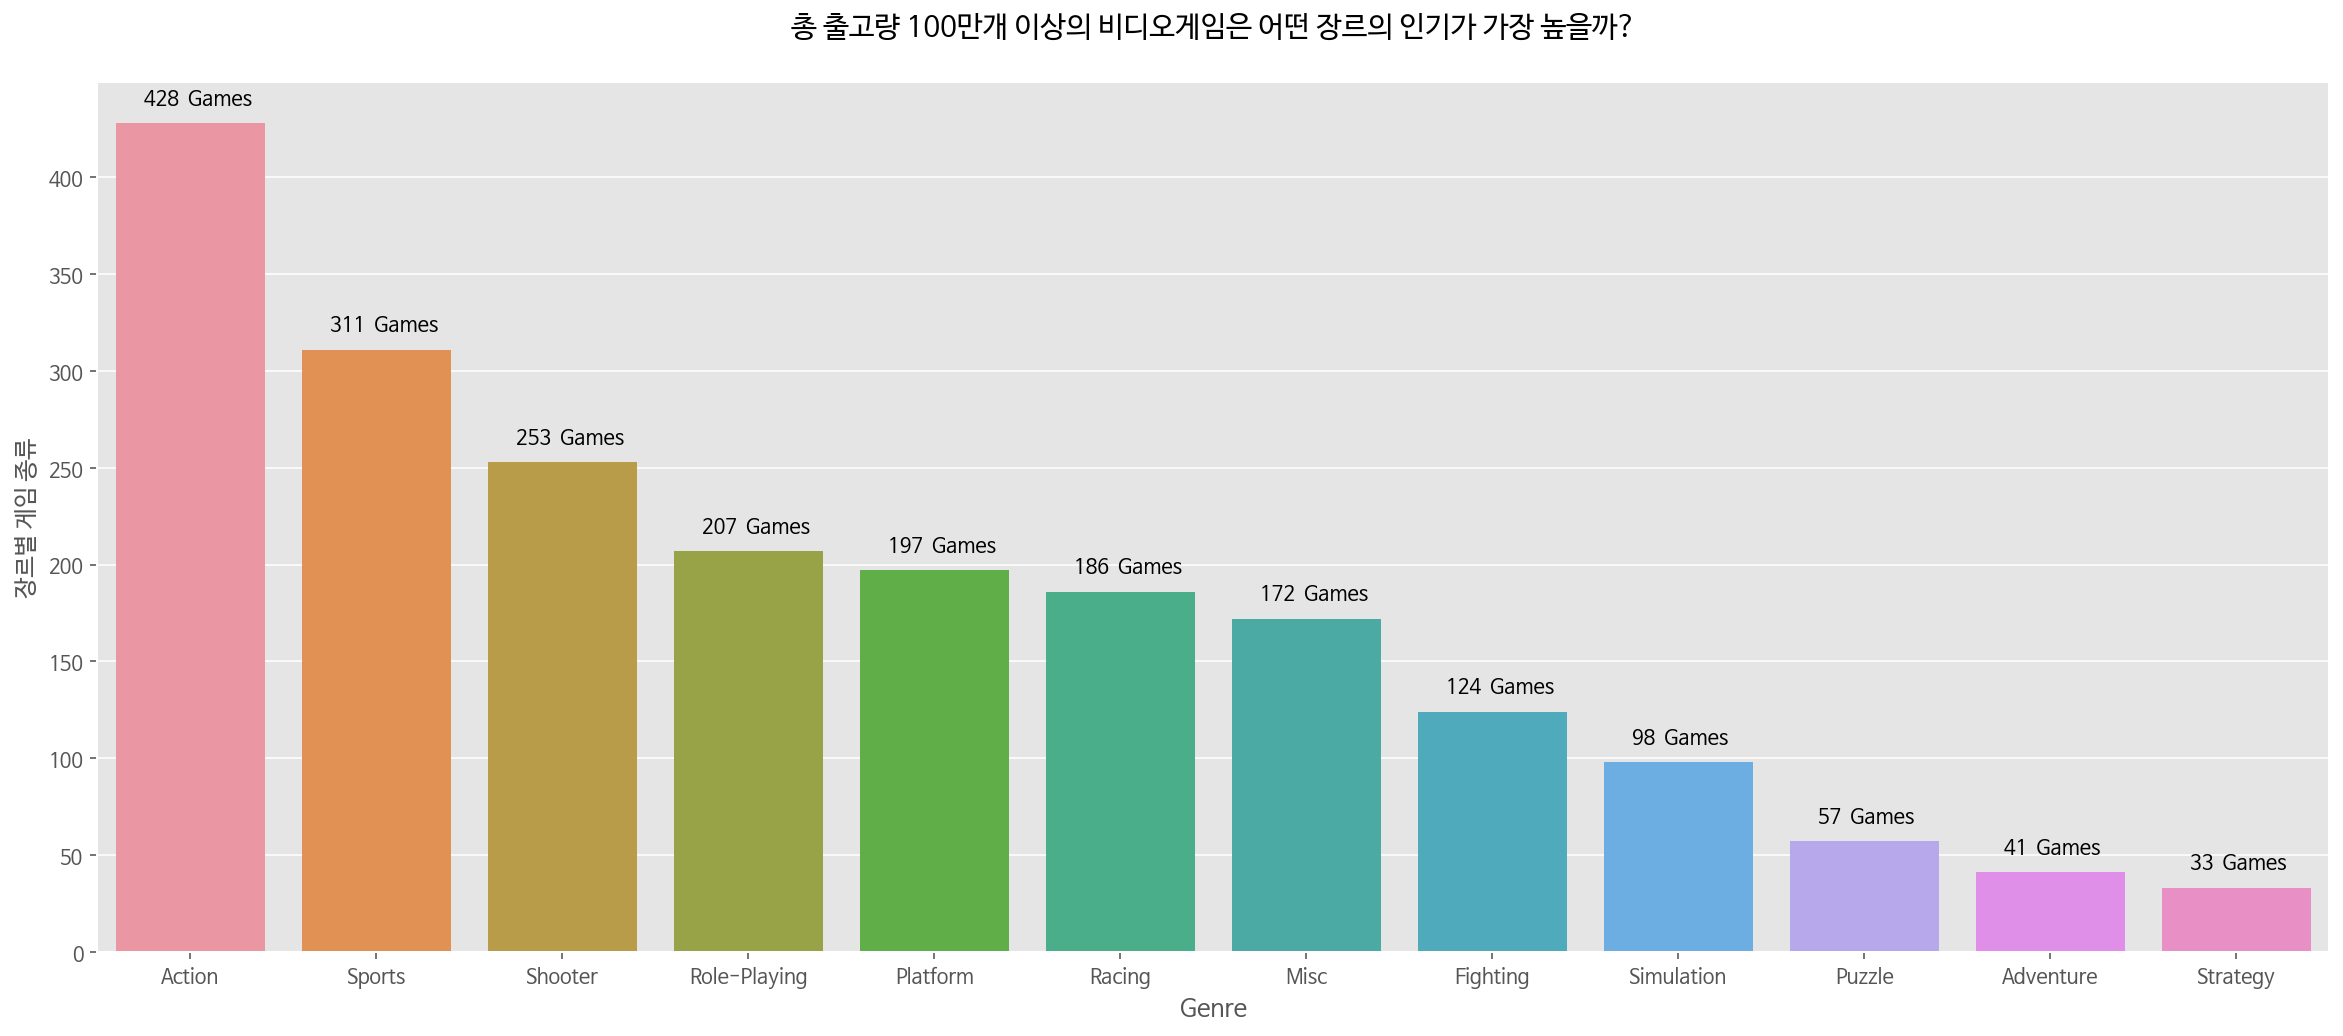

In [37]:
plt.figure(figsize=(20,8))
sns.barplot(data=ts_gen_df, x='Genre', y='Count', 
            order=ts_gen_df.sort_values('Count', ascending=False).Genre)
for i, (gen, count) in enumerate(ts_gen_df.values):
    plt.annotate('{}  Games'.format(count), (i-0.25, count+10))
plt.ylabel('장르별 게임 종류')
plt.title('총 출고량 100만개 이상의 비디오게임은 어떤 장르의 인기가 가장 높을까?\n')
plt.show()

In [38]:
pf_gen_ct = pd.crosstab(ts_df.Platform, ts_df.Genre)
pf_gen_ct

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
2600,2,0,0,2,6,3,1,0,9,0,0,0
3DS,12,0,2,1,7,1,1,17,0,4,1,0
DC,1,1,0,0,1,0,1,0,0,0,2,0
DS,23,10,0,23,13,16,5,25,1,26,3,4
GB,3,4,0,6,12,8,2,8,1,2,5,3
GBA,11,1,1,6,23,4,4,17,0,1,1,2
GC,9,1,3,6,7,2,5,5,3,2,4,2
GEN,1,0,3,0,5,0,0,0,0,0,2,0
N64,7,0,6,4,7,1,8,1,4,4,6,3


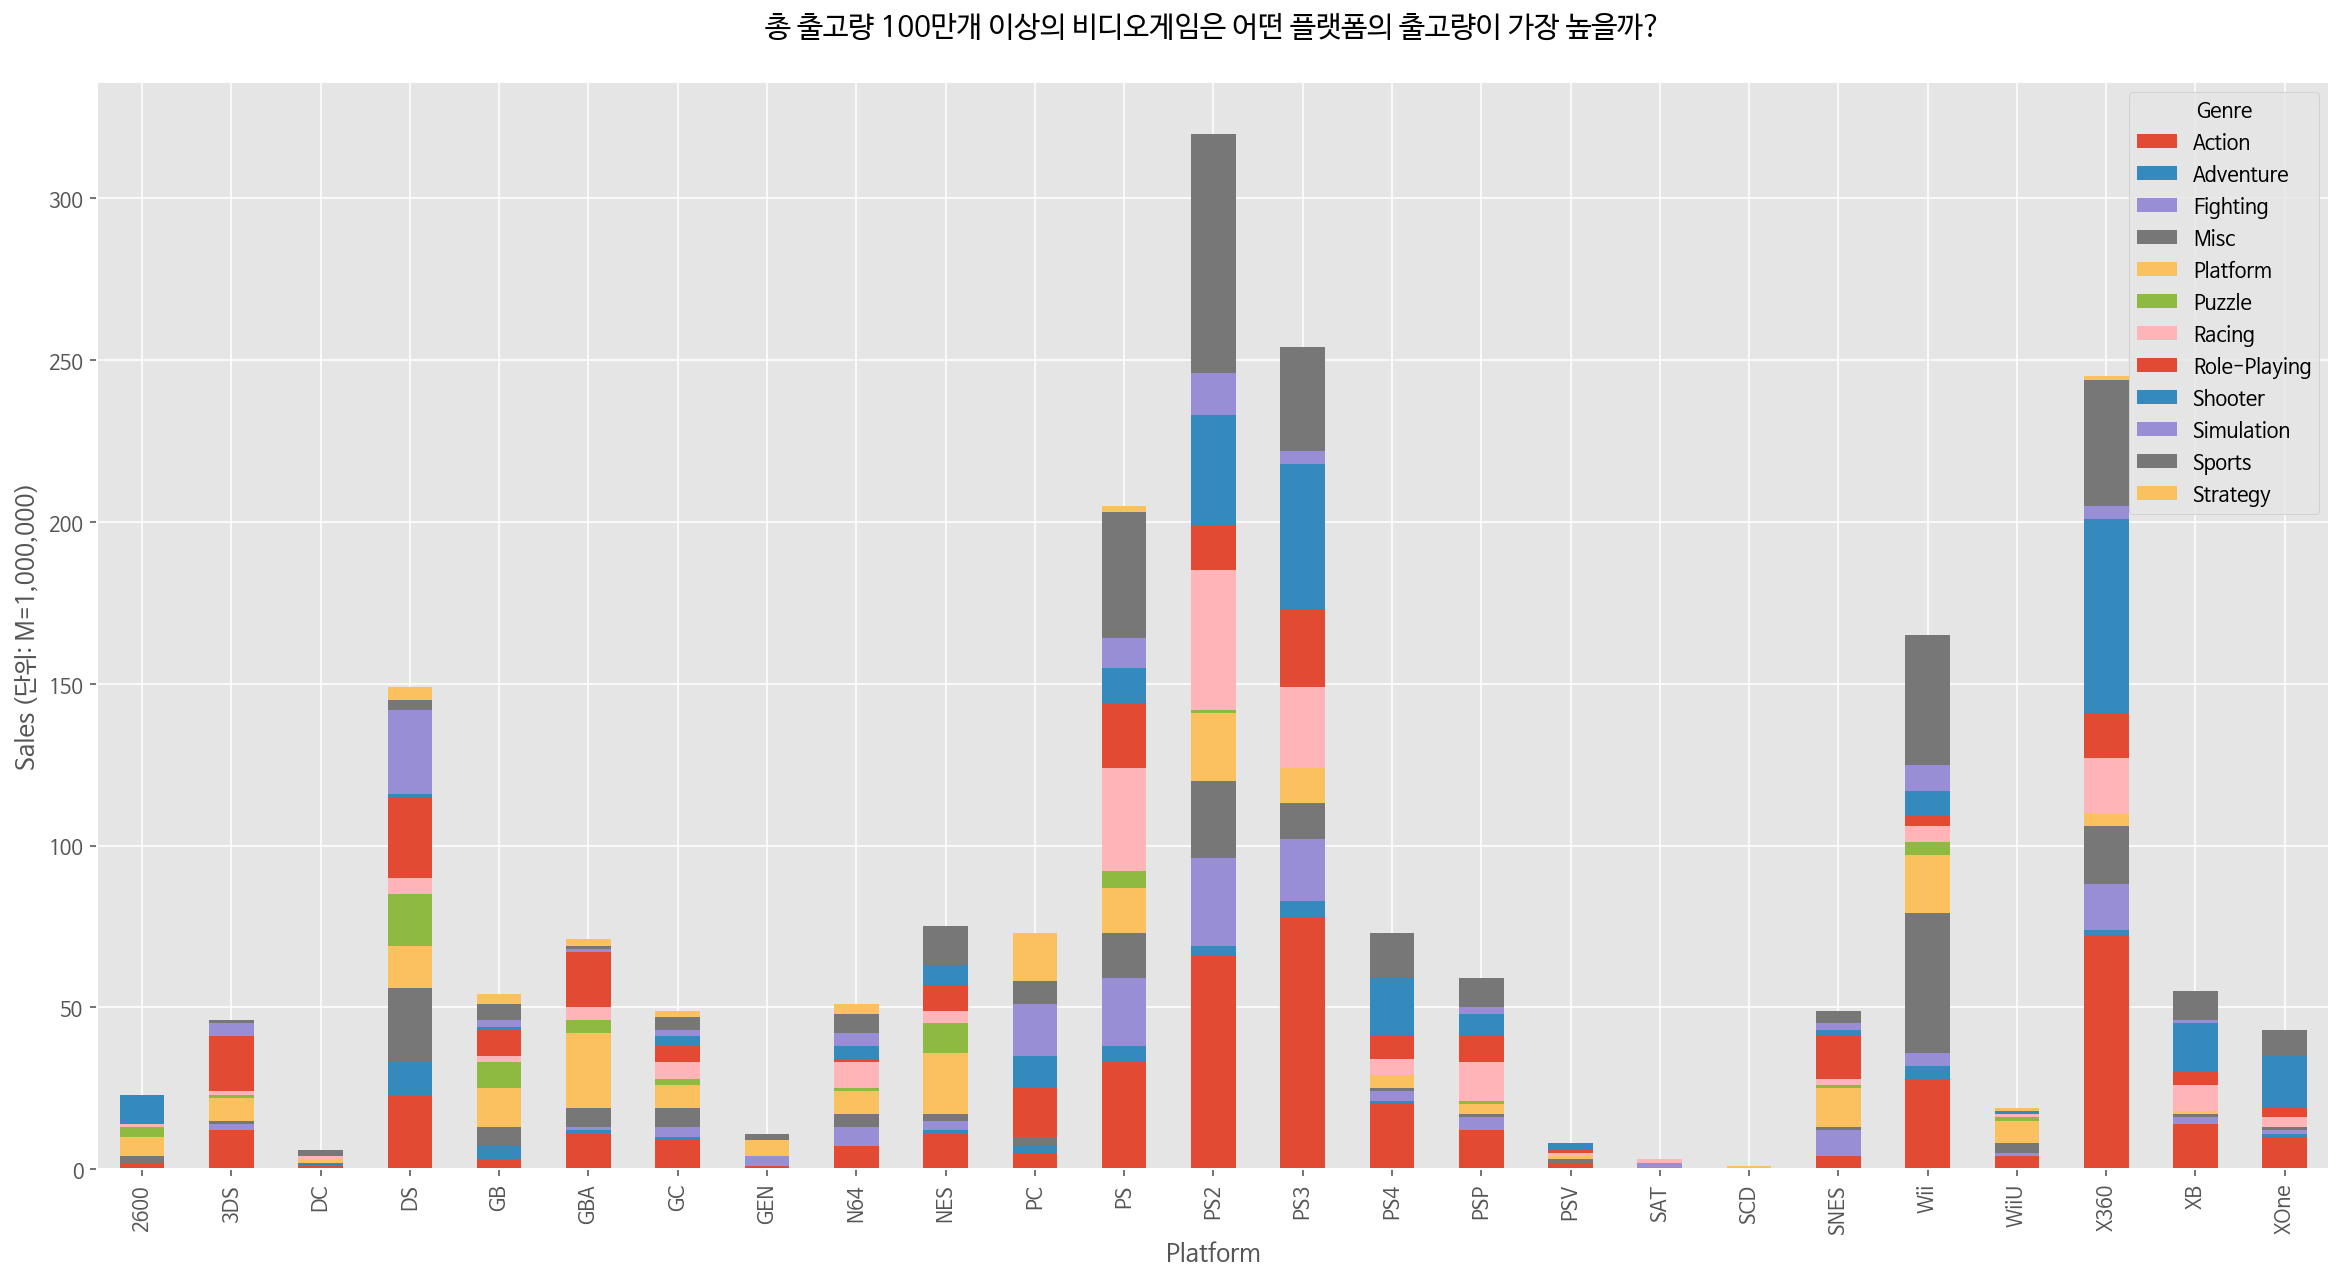

In [55]:
pf_gen_ct.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.ylabel('Sales (단위: M=1,000,000)')
plt.title('총 출고량 100만개 이상의 비디오게임은 어떤 플랫폼의 출고량이 가장 높을까?\n')
plt.show()

In [40]:
top_selling_15 = df_new['Total_Sales'].isin(df_new['Total_Sales'].sort_values(ascending=False).head(15))
ts15_df = df_new[top_selling_15].sort_values('Total_Sales', ascending=False)
ts15_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2909,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4200,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12580,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3353,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7830,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
1204,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6938,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
3015,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
16532,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
10489,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [41]:
New_name = list(zip(ts15_df['Name'].values, 
               ts15_df['Genre'].values, 
               ts15_df['Platform'].values,
               ts15_df['Year'].values))
New_name = ['\n'.join(x) for x in New_name]
ts15_df['Info'] = New_name

In [42]:
ts15_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Info
2909,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Wii Sports\nSports\nWii\n2006
4200,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Super Mario Bros.\nPlatform\nNES\n1985
12580,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,Mario Kart Wii\nRacing\nWii\n2008
3353,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Wii Sports Resort\nSports\nWii\n2009
7830,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,Pokemon Red/Pokemon Blue\nRole-Playing\nGB\n1996
1204,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,Tetris\nPuzzle\nGB\n1989
6938,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,New Super Mario Bros.\nPlatform\nDS\n2006
3015,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01,Wii Play\nMisc\nWii\n2006
16532,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61,New Super Mario Bros. Wii\nPlatform\nWii\n2009
10489,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,Duck Hunt\nShooter\nNES\n1984


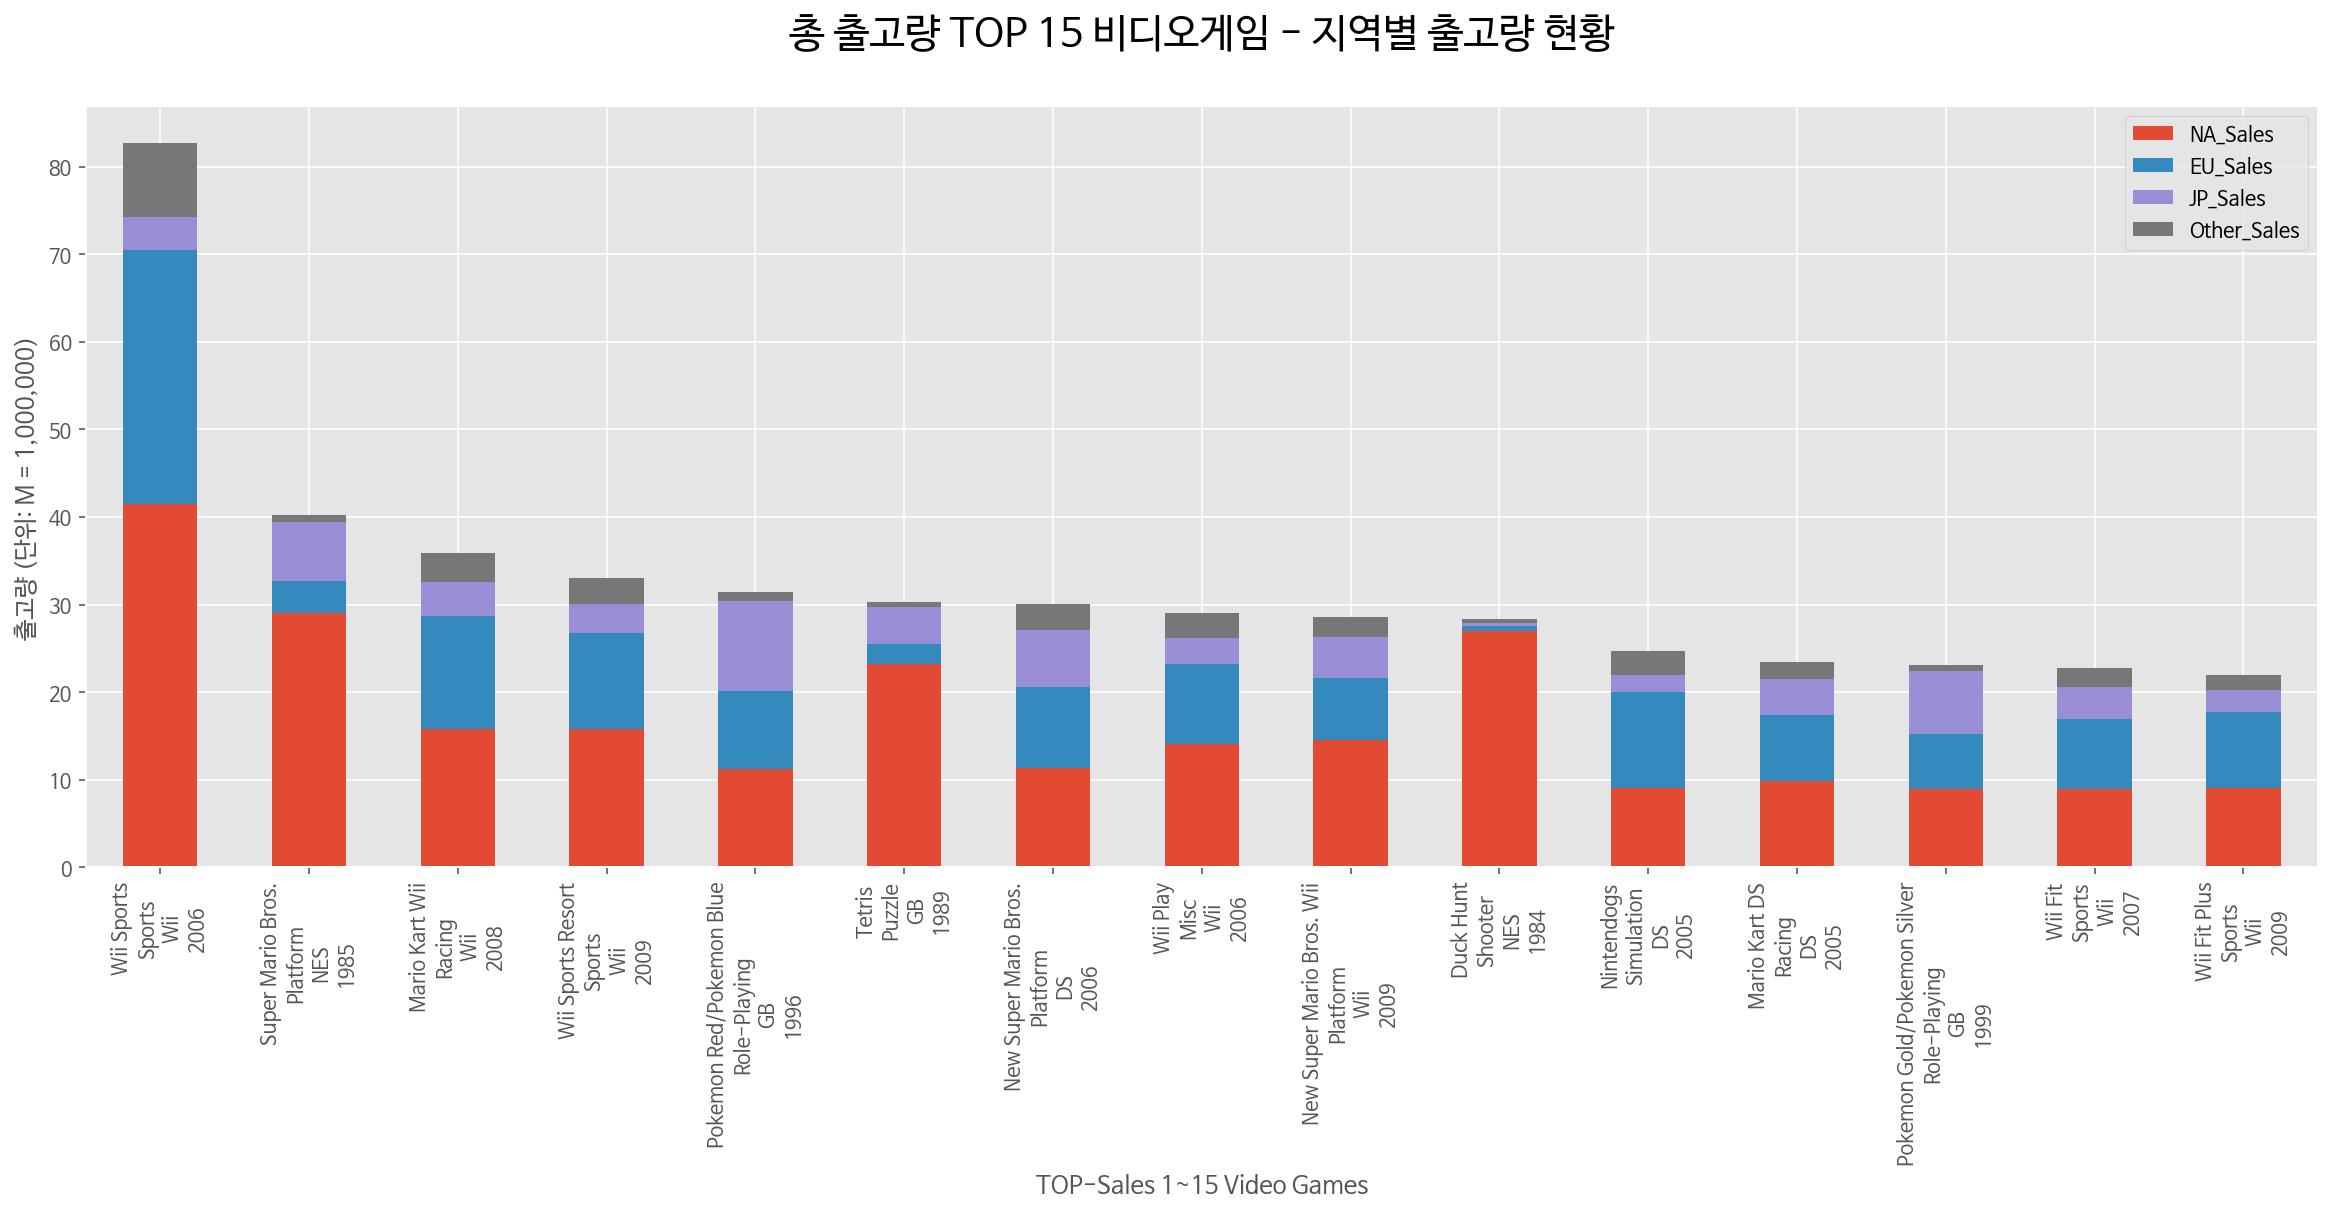

In [43]:
ts15_df[['Info', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].set_index('Info').plot(kind='bar', 
                                                                                            stacked=True,
                                                                                            figsize=(20,7))
plt.xticks(rotation=90)
plt.xlabel('TOP-Sales 1~15 Video Games')
plt.ylabel('출고량 (단위: M = 1,000,000)')
plt.title('총 출고량 TOP 15 비디오게임 - 지역별 출고량 현황\n', fontsize=20)
plt.show()

In [44]:
pd.concat((df_new.iloc[:, :-5], df_new.iloc[:, 7]), axis=1)

,Name,Platform,Year,Genre,Publisher,JP_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.00
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.00
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.02
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.00
...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.00
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.00
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.03
16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.25


In [45]:
ts_region = []
for col in cols[5:]:
    globals()['df_{}'.format(col)] = pd.concat((df_new.loc[(df_new[col].sort_values(ascending=False)[:100].index)].iloc[:,:-5],
                                                df_new.loc[(df_new[col].sort_values(ascending=False)[:100].index)].loc[:, col]), 
                                               axis=1)
    ts_region.append(globals()['df_{}'.format(col)])

In [46]:
ts_region

[                                         Name  ... NA_Sales
 2909                               Wii Sports  ...    41.49
 4200                        Super Mario Bros.  ...    29.08
 10489                               Duck Hunt  ...    26.93
 1204                                   Tetris  ...    23.20
 12580                          Mario Kart Wii  ...    15.85
 ...                                       ...  ...      ...
 1099   Crash Bandicoot 2: Cortex Strikes Back  ...     3.78
 10792                     The Legend of Zelda  ...     3.74
 10132                     Red Dead Redemption  ...     3.70
 9148                Crash Bandicoot 3: Warped  ...     3.68
 7944        LEGO Star Wars: The Complete Saga  ...     3.66
 
 [100 rows x 6 columns],
                                            Name  ... EU_Sales
 2909                                 Wii Sports  ...    29.02
 12580                            Mario Kart Wii  ...    12.88
 3353                          Wii Sports Resort  ..

In [47]:
for i in range(4):
    New_name = list(zip(ts_region[i]['Name'].values, 
                ts_region[i]['Genre'].values, 
                ts_region[i]['Platform'].values,
                ts_region[i]['Year'].values))
    New_name = ['\n'.join(x) for x in New_name]
    ts_region[i]['Info'] = New_name

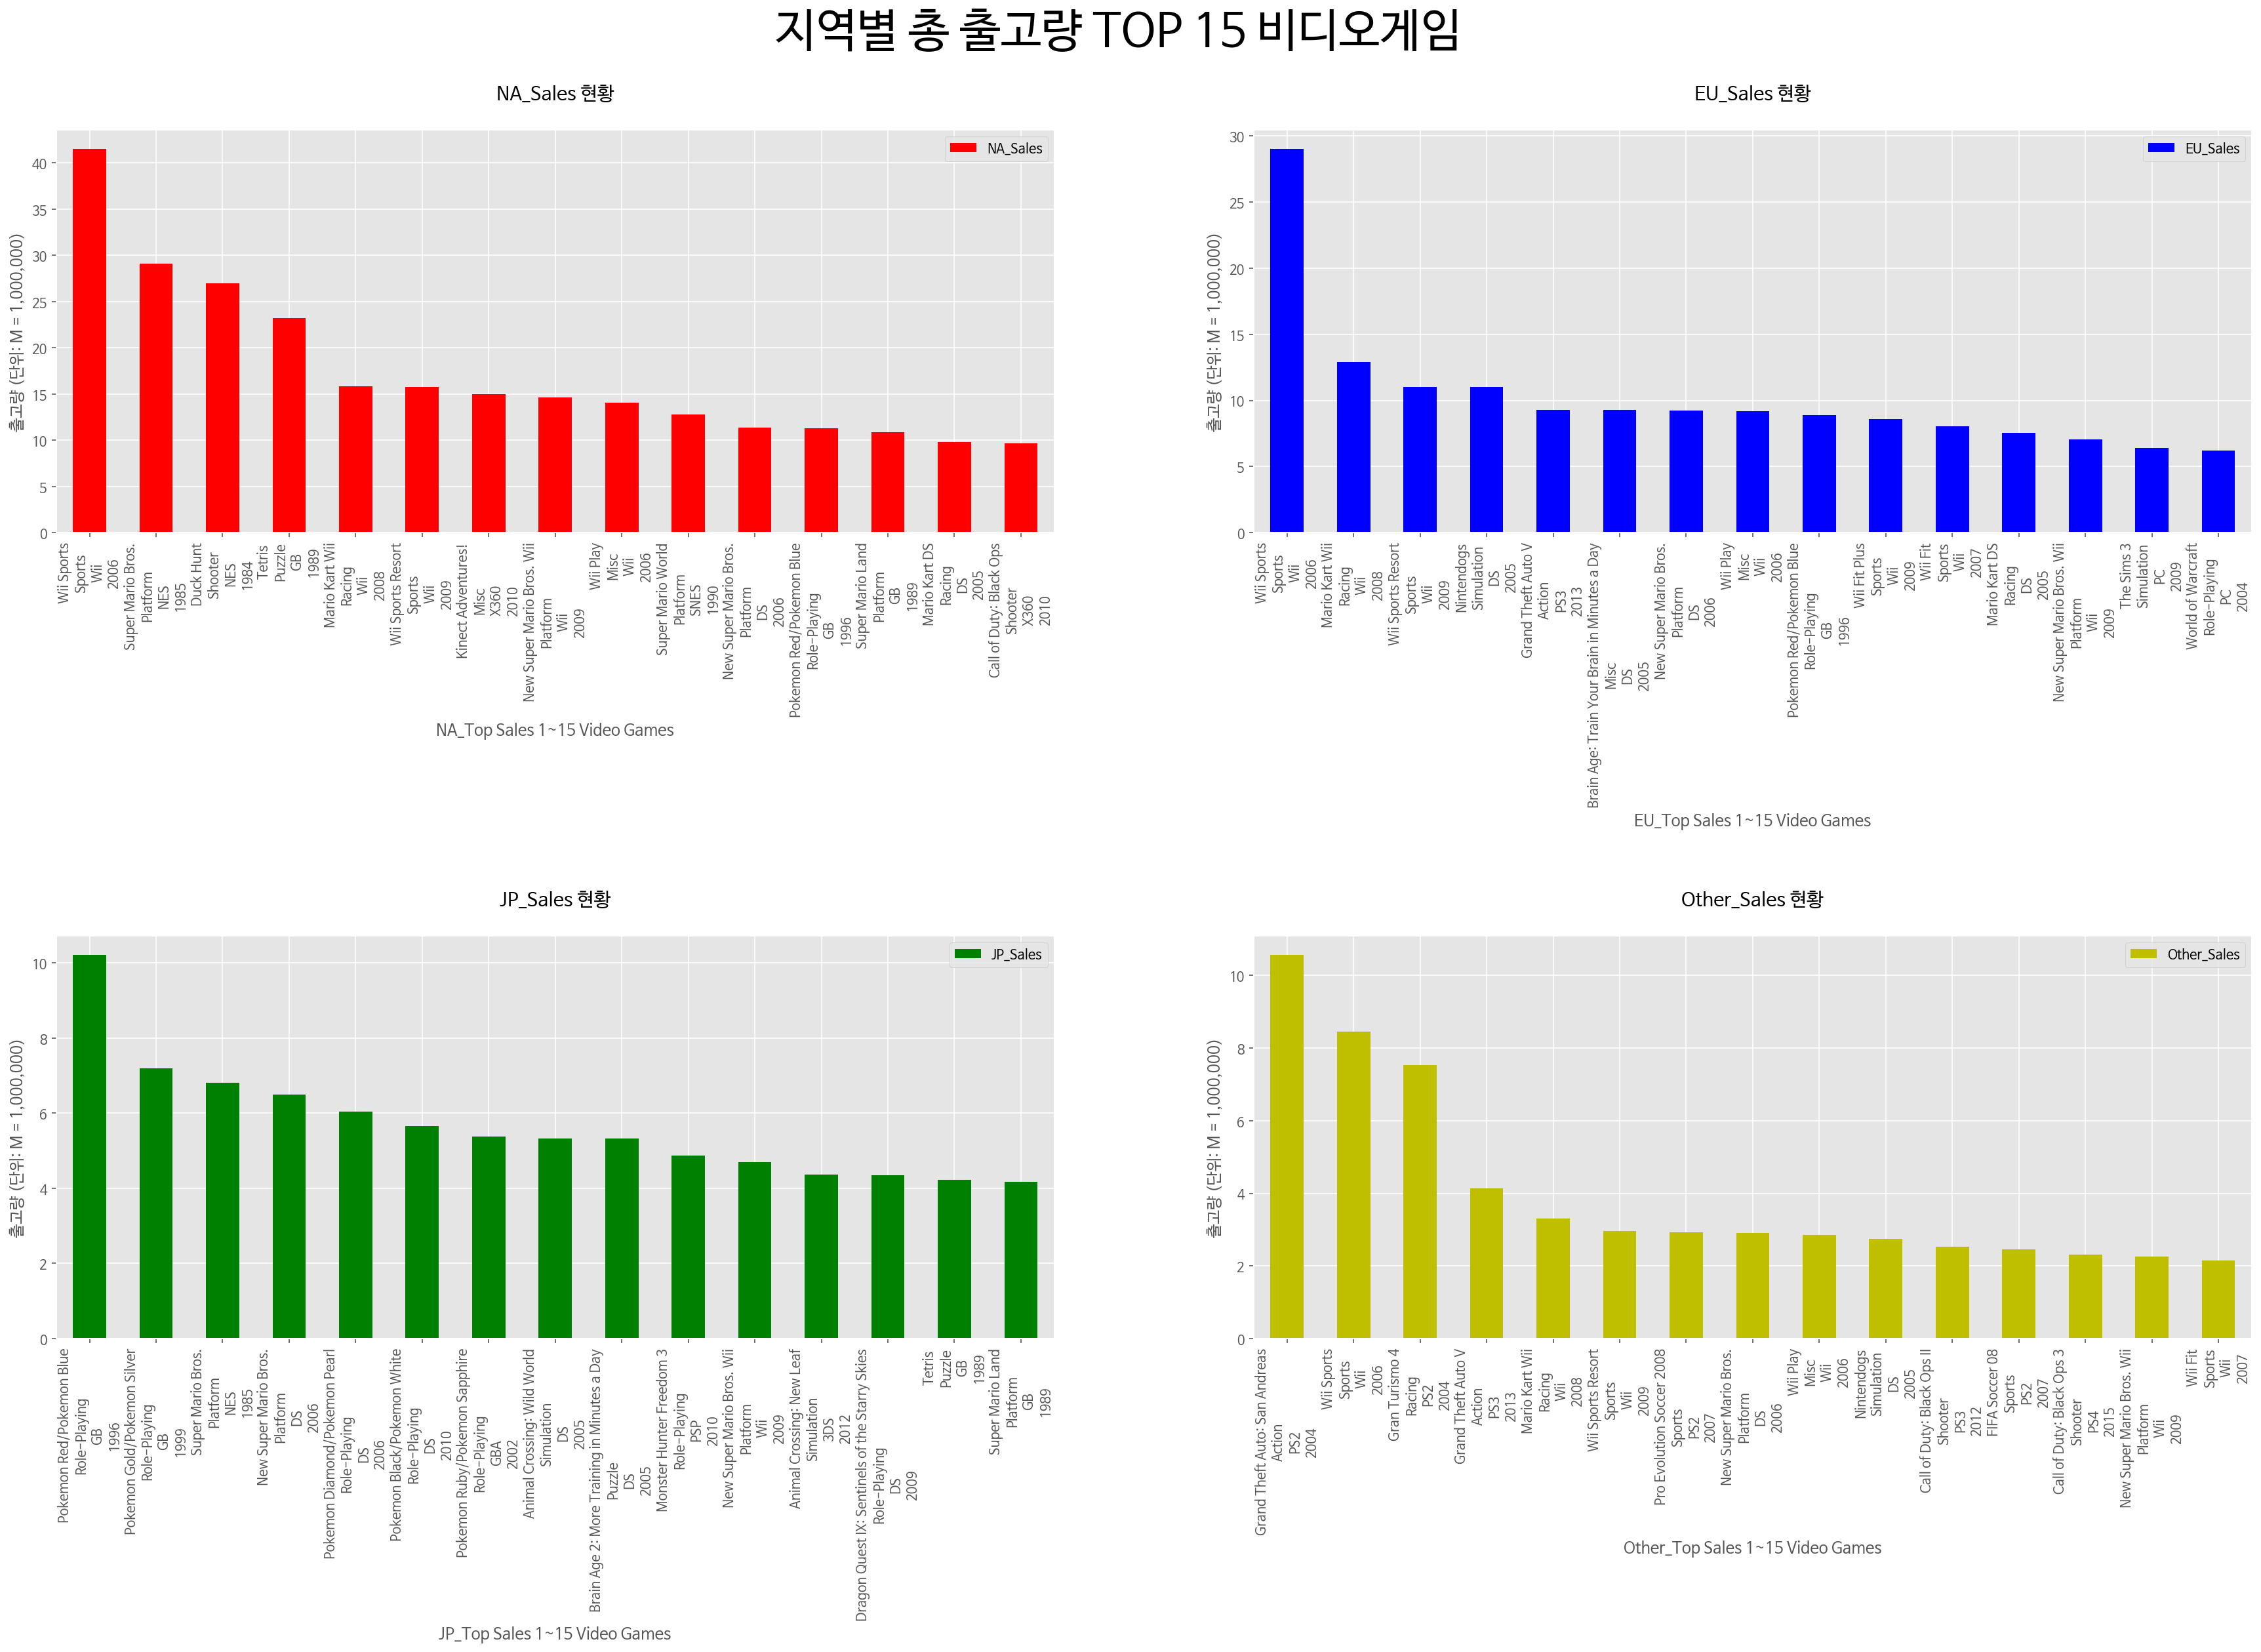

In [48]:
fig, axes = plt.subplots(2, 2)

c = 0
colors = ['r', 'b', 'g', 'y']
Sales_columns = cols[5:]
for row in range(2):
    for col in range(2):
        ts_region[c][['Info', Sales_columns[c]]][:15].set_index('Info').plot(kind='bar', 
                                                                             figsize=(30,16),
                                                                             color=colors[c],
                                                                             ax=axes[row][col])

        
        axes[row][col].set_xlabel('{}_Top Sales 1~15 Video Games'.format(Sales_columns[c][:-6]))
        axes[row][col].set_ylabel('출고량 (단위: M = 1,000,000)')
        axes[row][col].title.set_text('{} 현황\n'.format(Sales_columns[c]))
        c += 1
plt.suptitle('지역별 총 출고량 TOP 15 비디오게임\n', fontsize=35)
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=1)
plt.xticks(rotation=90)
plt.show()

In [60]:
platforms = df_new.Platform.unique().to_list()
print(platforms)
len(platforms)

['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB', 'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64', 'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX']


31

In [70]:
pf_dict = {'Nintendo':['DS', 'Wii', 'GBA', 'GC', '3DS', 'GB', 'NES', 'N64', 'SNES', 'WiiU'],
'PlayStation':['PSP', 'PS3', 'PS', 'PS4', 'PS2', 'PSV'],
'Microsoft':['XB', 'X360', 'XOne'],
'Atari':['2600'],
'Sega':['SAT', 'DC', 'GG', 'SCD', 'GEN'],
'NEC':['PCFX', 'TG16'],
'3DO':['3DO'],
'SNK':['NG'],
'Bandai':['WS']}

In [88]:
def new_pf_name(name):
    for new, ex in pf_dict.items():
        if name in ex:
            new_name = new
            return new_name

In [89]:
df_new_pf = df_new.copy()
df_new_pf['Platform'] = df_new_pf.Platform.apply(new_pf_name)
df_new_pf

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1,Candace Kane's Candy Factory,Nintendo,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Nintendo,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PlayStation,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,Nintendo,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PlayStation,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,Nintendo,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16595,Rainbow Islands: Revolution,PlayStation,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16596,NBA 2K16,PlayStation,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16597,Toukiden: The Age of Demons,PlayStation,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [114]:
year_platform_sales_df = []
for col in df_new_pf.columns[5:]:
    globals()['year_platform_sales_df_{}'.format(col)] = df_new_pf[['Platform', 'Year', col]].groupby(by=['Platform', 'Year']).sum().reset_index()
    year_platform_sales_df.append(globals()['year_platform_sales_df_{}'.format(col)])
year_platform_sales_df

[    Platform  Year  NA_Sales
 0        3DO  1994      0.00
 1        3DO  1995      0.00
 2      Atari  1980     10.13
 3      Atari  1981     33.40
 4      Atari  1982     26.92
 ..       ...   ...       ...
 107     Sega  2000      2.53
 108     Sega  2001      0.00
 109     Sega  2002      0.00
 110     Sega  2007      0.00
 111     Sega  2008      0.00
 
 [112 rows x 3 columns],     Platform  Year  EU_Sales
 0        3DO  1994      0.00
 1        3DO  1995      0.00
 2      Atari  1980      0.64
 3      Atari  1981      1.96
 4      Atari  1982      1.65
 ..       ...   ...       ...
 107     Sega  2000      0.79
 108     Sega  2001      0.00
 109     Sega  2002      0.00
 110     Sega  2007      0.00
 111     Sega  2008      0.00
 
 [112 rows x 3 columns],     Platform  Year  JP_Sales
 0        3DO  1994      0.02
 1        3DO  1995      0.08
 2      Atari  1980      0.00
 3      Atari  1981      0.00
 4      Atari  1982      0.00
 ..       ...   ...       ...
 107     Sega  200

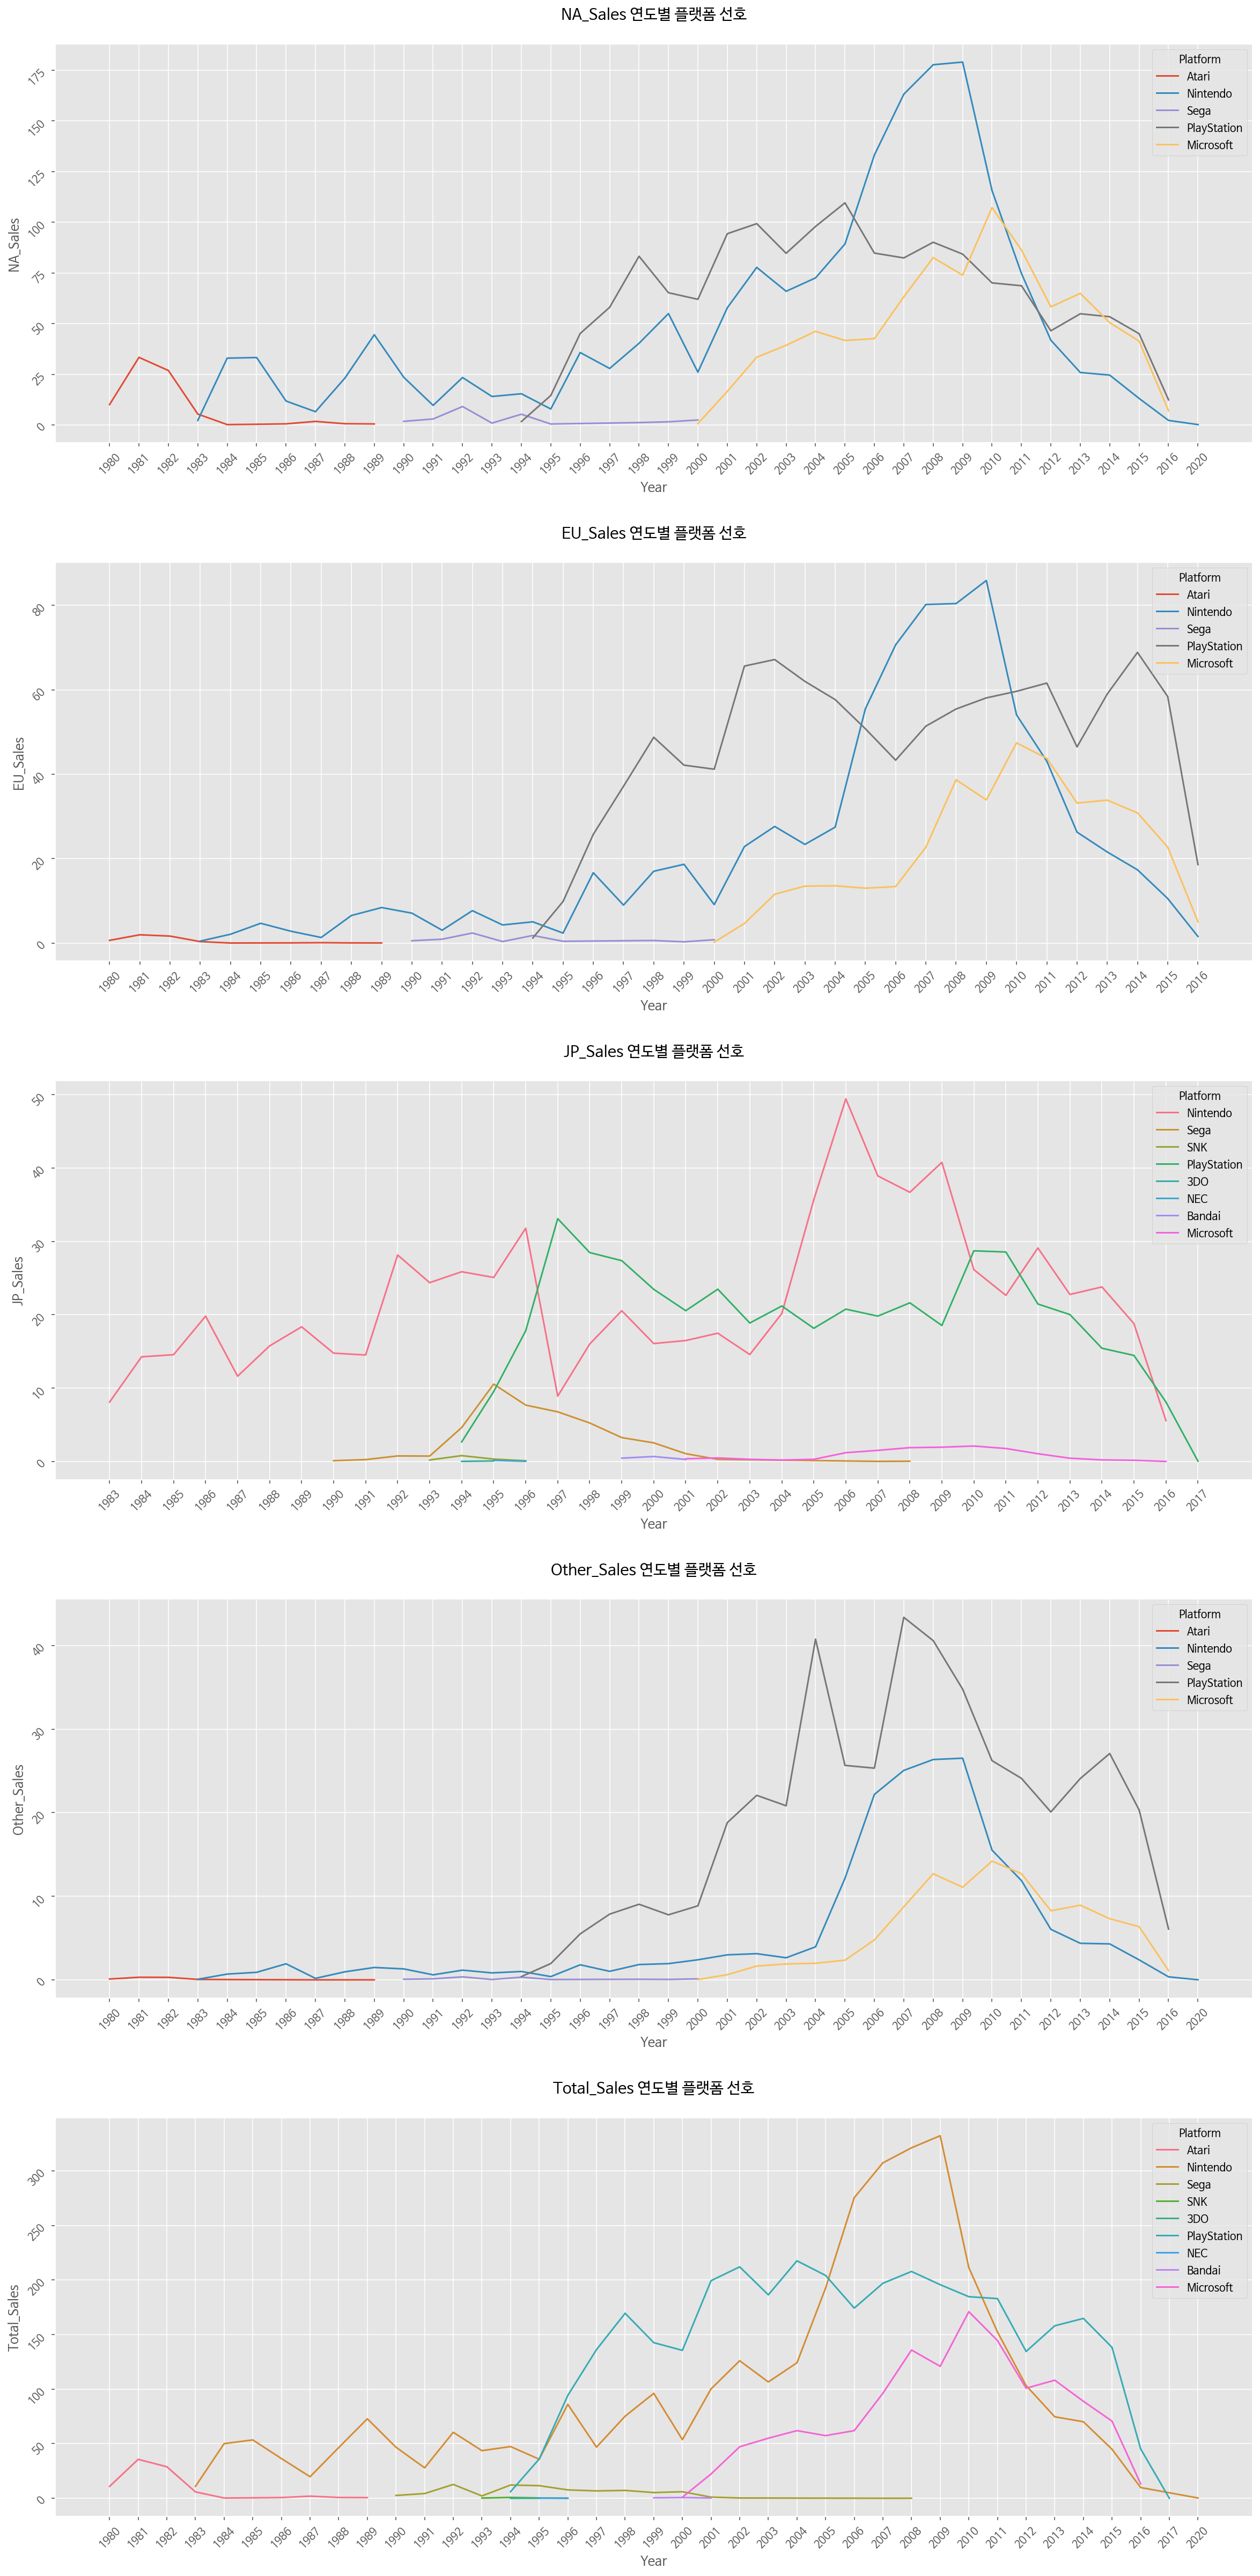

In [138]:
fig, axes = plt.subplots(5, 1, figsize=(20, 40))

for i, df in enumerate(year_platform_sales_df):
    df = df.loc[~(df[df_new_pf.columns[5:][i]] == 0)].sort_values('Year')
    sns.lineplot(data=df, x='Year', y=df_new_pf.columns[5:][i], hue='Platform', ax=axes[i])
    axes[i].set_title('{} 연도별 플랫폼 선호\n'.format(df_new_pf.columns[5:][i]))
    axes[i].tick_params(labelrotation=45)

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.05, hspace=0.3)

plt.show()